<a href="https://colab.research.google.com/github/Karlajack/pydata_analysis/blob/main/pandasweeklyproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Apple Stock**

Step 1. Import the necessary libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader.data as web
import yfinance as yf


In [2]:

pip install yfinance

Step 2. Import the dataset from this address

https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv

Step 3. Assign it to a variable apple

In [ ]:
url='https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'
apple=pd.read_csv(url)
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


Step 4. Check out the type of the columns

In [ ]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

Step 5. Transform the Date column as a datetime type

In [ ]:
apple['Date'] = pd.to_datetime(apple['Date'])

Step 6. Set the date as the index

In [ ]:
apple = apple.set_index('Date')

apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52



Step 7. Is there any duplicate dates?

In [ ]:
apple.index.is_unique

True

Step 8. Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [ ]:
apple.sort_index(ascending = True).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


In [ ]:
Step 9. Get the last business day of each month

In [ ]:
apple_month = apple.resample('BM').mean()
apple_month



apple_month.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333


Step 10. What is the difference in days between the first day and the oldest

In [ ]:
(apple.index.max() - apple.index.min()).days

12261

Step 11. How many months in the data we have?

In [ ]:
apple_months = apple.resample('BM').mean()

len(apple_months.index)

404

Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

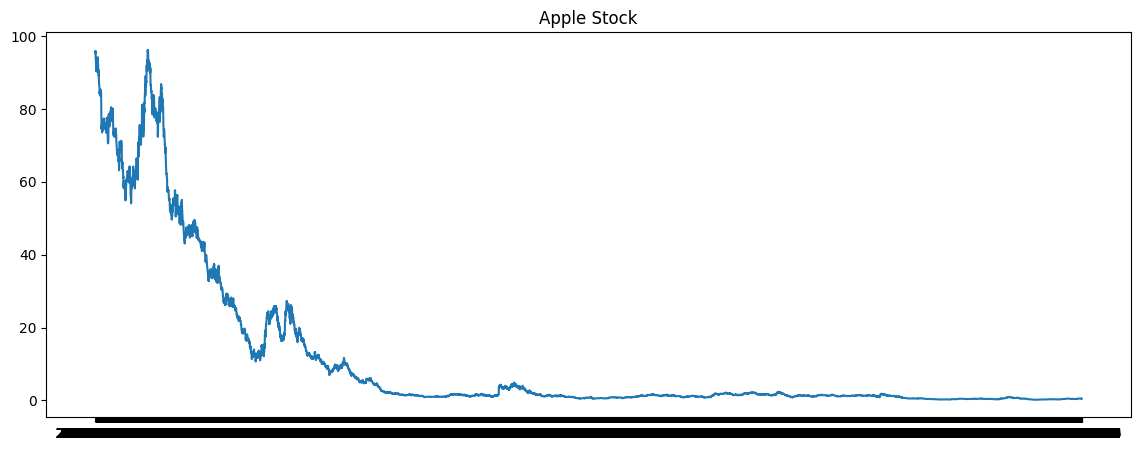

In [ ]:
plt.figure(figsize=(14,5))
y=apple['Adj Close']
plt.plot(x,y)
plt.title("Apple Stock")
plt.show()






**Getting_Financial_Data**

Step 2. Create your time range (start and end variables). The start date should be 01/01/2015 and the end should today (whatever your today is)

In [17]:

# Define a start date and end date
start_date = '2022-01-01'
end_date = '2024-03-31'



start_date
end_date




'2024-03-31'

Step 3. Select the Apple, Tesla, Twitter, IBM, LinkedIn stocks symbols and assign them to a variable called stocks

In [21]:

stock  = ['AAPL', 'TSLA', 'IBM', 'LNKD']
stock

['AAPL', 'TSLA', 'IBM', 'LNKD']

In [23]:
data = yf.download('AAPL', start_date, end_date)
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.724548,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.443573,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.723572,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,169.840271,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.008118,86709100
...,...,...,...,...,...,...
2024-03-22,171.759995,173.050003,170.059998,172.279999,172.279999,71106600
2024-03-25,170.570007,171.940002,169.449997,170.850006,170.850006,54288300
2024-03-26,170.000000,171.419998,169.580002,169.710007,169.710007,57388400


Step 4. Read the data from yahoo finace, assign to df and print it

In [80]:



df_apple= yf.download('AAPL', start_date, end_date)
df_tsla= yf.download('TSLA',  start_date, end_date)
df_ibm= yf.download('IBM', start_date, end_date)
df_lnkd = yf.download('LNKD', start_date, end_date)




df_apple['stock'] = 'AAPL'
df_tsla['stock'] = 'TSLA'
df_ibm['stock'] = 'IBM'
df_lnkd['stock'] = 'MSFT'

df = pd.concat([df_apple,df_tsla,df_ibm,df_lnkd])

df['Date'] = df.index
df = df.set_index(['Date','stock'],drop=True)
df









[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LNKD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-01-01 -> 2024-03-31)')


,,Open,High,Low,Close,Adj Close,Volume
Date,stock,,,,,,
2022-01-03,AAPL,177.830002,182.880005,177.710007,182.009995,179.724548,104487900.0
2022-01-04,AAPL,182.630005,182.940002,179.119995,179.699997,177.443573,99310400.0
2022-01-05,AAPL,179.610001,180.169998,174.639999,174.919998,172.723572,94537600.0
2022-01-06,AAPL,172.699997,175.300003,171.639999,172.000000,169.840271,96904000.0
2022-01-07,AAPL,172.889999,174.139999,171.029999,172.169998,170.008118,86709100.0
...,...,...,...,...,...,...,...
2024-03-22,IBM,192.000000,192.990005,190.509995,190.839996,190.839996,3987700.0
2024-03-25,IBM,190.259995,190.820007,188.750000,188.789993,188.789993,3718300.0
2024-03-26,IBM,189.020004,190.000000,188.500000,188.500000,188.500000,4229500.0


Step 5. What is the type of structure of df ?

In [81]:
type(df)

pandas.core.frame.DataFrame

Step 6. Print all the Items axis values

In [ ]:
df.items

<bound method DataFrame.items of                      Open     High      Low    Close        Volume
Date       stock                                                  
2024-04-11 AAPL   168.340  175.460  168.160  175.040  9.107028e+07
2024-04-10 AAPL   168.800  169.090  167.110  167.780  4.970934e+07
2024-04-09 AAPL   168.700  170.080  168.350  169.670  4.245121e+07
2024-04-08 AAPL   169.030  169.200  168.240  168.450  3.742551e+07
2024-04-05 AAPL   169.590  170.390  168.950  169.580  4.210483e+07
...                   ...      ...      ...      ...           ...
2015-01-08 IBM    110.387  112.377  109.909  111.928  6.001319e+06
2015-01-07 IBM    111.050  111.050  108.854  109.567  6.653528e+06
2015-01-06 IBM    112.836  113.041  109.635  110.269  8.698870e+06
2015-01-05 IBM    113.948  113.948  112.465  112.709  6.906071e+06
2015-01-02 IBM    113.958  115.383  113.773  114.544  7.819521e+06

[7002 rows x 5 columns]>

Step 7. Good, now we know the data avaiable. Create a dataFrame called vol, with the Volume values.

In [82]:
vol = df['Volume']
vol.head()

Date        stock
2022-01-03  AAPL     104487900.0
2022-01-04  AAPL      99310400.0
2022-01-05  AAPL      94537600.0
2022-01-06  AAPL      96904000.0
2022-01-07  AAPL      86709100.0
Name: Volume, dtype: float64

Step 8. Aggregate the data of Volume to weekly
Hint: Be careful to not sum data from the same week of 2015 and other years.

In [83]:
vol= vol.unstack().resample('W').sum()
vol['year']= vol.index.year
vol['month'] = vol.index.month

#month = vol.groupby(['month','year']).sum()
#month.head(10)


Step 9. Find all the volume traded in the year of 2023

In [46]:
vol['year'] = vol.index.year

year = vol.groupby(['year']).sum()
year

stock,AAPL,IBM,TSLA,month
year,,,,
2022,2.175832e+10,1.246367e+09,2.101161e+10,334
2023,1.511144e+10,1.124483e+09,3.513997e+10,346
2024,3.781629e+09,3.185491e+08,6.262596e+09,27


BONUS: Create your own question and answer it.

**Investor_Flow_of_Funds_US**

Step 2. Import the dataset from this address.
https://raw.githubusercontent.com/datasets/investor-flow-of-funds-us/master/data/weekly.csv
Step 3. Assign it to a variable called

In [66]:
url = 'https://raw.githubusercontent.com/datasets/investor-flow-of-funds-us/master/data/weekly.csv'
df = pd.read_csv(url)
df.head()

,Date,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
0,2012-12-05,-7426,-6060,-1367,-74,5317,4210,1107,-2183
1,2012-12-12,-8783,-7520,-1263,123,1818,1598,219,-6842
2,2012-12-19,-5496,-5470,-26,-73,103,3472,-3369,-5466
3,2012-12-26,-4451,-4076,-375,550,2610,3333,-722,-1291
4,2013-01-02,-11156,-9622,-1533,-158,2383,2103,280,-8931


Step 4. What is the frequency of the dataset?

# weekly data

Step 5. Set the column Date as the index.

In [67]:
df = df.set_index('Date')
df.head()

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-05,-7426,-6060,-1367,-74,5317,4210,1107,-2183
2012-12-12,-8783,-7520,-1263,123,1818,1598,219,-6842
2012-12-19,-5496,-5470,-26,-73,103,3472,-3369,-5466
2012-12-26,-4451,-4076,-375,550,2610,3333,-722,-1291
2013-01-02,-11156,-9622,-1533,-158,2383,2103,280,-8931


Step 6. What is the type of the index?

In [71]:
df.index

Index(['2012-12-05', '2012-12-12', '2012-12-19', '2012-12-26', '2013-01-02',
       '2013-01-09', '2014-04-02', '2014-04-09', '2014-04-16', '2014-04-23',
       '2014-04-30', '2014-05-07', '2014-05-14', '2014-05-21', '2014-05-28',
       '2014-06-04', '2014-06-11', '2014-06-18', '2014-06-25', '2014-07-02',
       '2014-07-09', '2014-07-30', '2014-08-06', '2014-08-13', '2014-08-20',
       '2014-08-27', '2014-09-03', '2014-09-10', '2014-11-05', '2014-11-12',
       '2014-11-19', '2014-11-25', '2015-01-07', '2015-01-14', '2015-01-21',
       '2015-01-28', '2015-02-04', '2015-02-11', '2015-03-04', '2015-03-11',
       '2015-03-18', '2015-03-25', '2015-04-01', '2015-04-08'],
      dtype='object', name='Date')

#Object

Step 7. Set the index to a DatetimeIndex type

In [74]:
df.index = pd.to_datetime(df.index)
type(df.index)



pandas.core.indexes.datetimes.DatetimeIndex

Step 8. Change the frequency to monthly, sum the values and assign it to monthly.

In [75]:
monthly = df.resample('M').sum()
monthly

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-31,-26156,-23126,-3031,526,9848,12613,-2765,-15782
2013-01-31,3661,-1627,5288,2730,12149,9414,2735,18540
2013-02-28,0,0,0,0,0,0,0,0
2013-03-31,0,0,0,0,0,0,0,0
2013-04-30,0,0,0,0,0,0,0,0
2013-05-31,0,0,0,0,0,0,0,0
2013-06-30,0,0,0,0,0,0,0,0
2013-07-31,0,0,0,0,0,0,0,0
2013-08-31,0,0,0,0,0,0,0,0


Step 9. You will notice that it filled the dataFrame with months that don't have any data with NaN. Let's drop these rows.

In [88]:
monthly = monthly.replace(0,np.nan)
monthly = monthly.dropna()
monthly

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-31,-26156.0,-23126.0,-3031.0,526.0,9848.0,12613.0,-2765.0,-15782.0
2013-01-31,3661.0,-1627.0,5288.0,2730.0,12149.0,9414.0,2735.0,18540.0
2014-04-30,10842.0,1048.0,9794.0,4931.0,8493.0,7193.0,1300.0,24267.0
2014-05-31,-2203.0,-8720.0,6518.0,3172.0,13767.0,10192.0,3576.0,14736.0
2014-06-30,2319.0,-6546.0,8865.0,4588.0,9715.0,7551.0,2163.0,16621.0
2014-07-31,-7051.0,-11128.0,4078.0,2666.0,7506.0,7026.0,481.0,3122.0
2014-08-31,1943.0,-5508.0,7452.0,1885.0,1897.0,-1013.0,2910.0,5723.0
2014-09-30,-2767.0,-6596.0,3829.0,1599.0,3984.0,2479.0,1504.0,2816.0
2014-11-30,-2753.0,-7239.0,4485.0,729.0,14528.0,11566.0,2962.0,12502.0


Step 10. Good, now we have the monthly data. Now change the frequency to year.

In [94]:
yearly = monthly.resample('Y').sum()
yearly.head()

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-31,-26156.0,-23126.0,-3031.0,526.0,9848.0,12613.0,-2765.0,-15782.0
2013-12-31,3661.0,-1627.0,5288.0,2730.0,12149.0,9414.0,2735.0,18540.0
2014-12-31,330.0,-44689.0,45021.0,19570.0,59890.0,44994.0,14896.0,79787.0
2015-12-31,15049.0,-10459.0,25508.0,7280.0,26028.0,17986.0,8041.0,48357.0


**Iris**

Step 2. Import the dataset from this address.
https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Step 3. Assign it to a variable called iris

In [95]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(url)

iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Step 4. Create columns for the dataset

In [99]:
#columns
# 1. sepal_length (in cm)
# 2. sepal_width (in cm)
# 3. petal_length (in cm)
# 4. petal_width (in cm)
# 5. class

iris.columns = ['sepal_length','sepal_width', 'petal_length', 'petal_width', 'class']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Step 5. Is there any missing value in the dataframe?

In [102]:

pd.isnull(iris).sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

Step 6. Lets set the values of the rows 10 to 29 of the column 'petal_length' to NaN

In [108]:
iris.iloc[10:30,2:3] = np.nan
iris.head(20)


,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


Step 7. Good, now lets substitute the NaN values to 1.0

In [117]:
iris.petal_length.fillna(1, inplace = True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,NaN,1.0,NaN
1,NaN,NaN,1.0,NaN
2,NaN,NaN,1.0,NaN
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


Step 8. Now let's delete the column class

In [110]:
del iris['class']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


Step 9. Set the first 3 rows as NaN

In [116]:
iris.iloc[0:3 ,:] = np.nan
iris.head()


,sepal_length,sepal_width,petal_length,petal_width
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


Step 10. Delete the rows that have NaN

In [118]:
iris = iris.dropna(how='any')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4
5,4.6,3.4,1.4,0.3
6,5.0,3.4,1.5,0.2
7,4.4,2.9,1.4,0.2


Step 11. Reset the index so it begins with 0 again

In [119]:
iris = iris.reset_index(drop = True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,3.6,1.4,0.2
1,5.4,3.9,1.7,0.4
2,4.6,3.4,1.4,0.3
3,5.0,3.4,1.5,0.2
4,4.4,2.9,1.4,0.2


**Wine**

Step 2. Import the dataset from this address
https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

Step 3. Assign it to a variable called wine

In [140]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
wine = pd.read_csv(url)

wine.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


Step 4. Delete the first, fourth, seventh, nineth, eleventh, thirteenth and fourteenth columns

In [141]:
wine = wine.drop(wine.columns[[0,3,6,8,11,12,13]], axis = 1)

wine.head()

,14.23,1.71,15.6,127,3.06,2.29,5.64
0,13.20,1.78,11.2,100,2.76,1.28,4.38
1,13.16,2.36,18.6,101,3.24,2.81,5.68
2,14.37,1.95,16.8,113,3.49,2.18,7.80
3,13.24,2.59,21.0,118,2.69,1.82,4.32
4,14.20,1.76,15.2,112,3.39,1.97,6.75


Step 5. Assign the columns as below:

alcohol
malic_acid
alcalinity_of_ash
magnesium
flavanoids
proanthocyanins
hue

> Add blockquote



In [142]:
wine.columns = ['alcohol', 'malic_acid', 'alcalinity_of_ash', 'magnesium', 'flavanoids', 'proanthocyanins', 'hue']
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,13.20,1.78,11.2,100,2.76,1.28,4.38
1,13.16,2.36,18.6,101,3.24,2.81,5.68
2,14.37,1.95,16.8,113,3.49,2.18,7.80
3,13.24,2.59,21.0,118,2.69,1.82,4.32
4,14.20,1.76,15.2,112,3.39,1.97,6.75


Step 6. Set the values of the first 3 rows from alcohol as NaN

In [143]:
wine.iloc[0:3,0]=np.nan
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.78,11.2,100,2.76,1.28,4.38
1,NaN,2.36,18.6,101,3.24,2.81,5.68
2,NaN,1.95,16.8,113,3.49,2.18,7.80
3,13.24,2.59,21.0,118,2.69,1.82,4.32
4,14.20,1.76,15.2,112,3.39,1.97,6.75


Step 7. Now set the value of the rows 3 and 4 of magnesium as NaN

In [146]:
wine.iloc[2:4,3:4]=np.nan
wine.head(6)


,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.78,11.2,100.0,2.76,1.28,4.38
1,NaN,2.36,18.6,101.0,3.24,2.81,5.68
2,NaN,1.95,16.8,NaN,3.49,2.18,7.80
3,13.24,2.59,21.0,NaN,2.69,1.82,4.32
4,14.20,1.76,15.2,112.0,3.39,1.97,6.75
5,14.39,1.87,14.6,96.0,2.52,1.98,5.25


Step 8. Fill the value of NaN with the number 10 in alcohol and 100 in magnesium

In [151]:
wine.alcohol.fillna(10, inplace = True)

wine.magnesium.fillna(100, inplace = True)

wine.head(10)

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,1.78,11.2,100.0,2.76,1.28,4.38
1,10.00,2.36,18.6,101.0,3.24,2.81,5.68
2,10.00,1.95,16.8,100.0,3.49,2.18,7.80
3,13.24,2.59,21.0,100.0,2.69,1.82,4.32
4,10.00,1.76,15.2,112.0,3.39,1.97,6.75
5,10.00,1.87,14.6,96.0,2.52,1.98,5.25
6,14.06,2.15,17.6,121.0,2.51,1.25,5.05
7,10.00,1.64,14.0,97.0,2.98,1.98,5.20
8,13.86,1.35,16.0,98.0,3.15,1.85,7.22
9,10.00,2.16,18.0,105.0,3.32,2.38,5.75


Step 9. Count the number of missing values

In [148]:
wine.isnull().sum()

alcohol              0
malic_acid           0
alcalinity_of_ash    0
magnesium            0
flavanoids           0
proanthocyanins      0
hue                  0
dtype: int64

Step 10. Create an array of 10 random numbers up until 10

In [149]:
random = np.random.randint(10, size = 10)
random

array([0, 1, 5, 0, 2, 7, 4, 9, 7, 7])

Step 11. Use random numbers you generated as an index and assign NaN value to each of cell.

In [154]:
wine.alcohol[random] = np.nan
wine.head(10)

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.78,11.2,100.0,2.76,1.28,4.38
1,NaN,2.36,18.6,101.0,3.24,2.81,5.68
2,NaN,1.95,16.8,100.0,3.49,2.18,7.80
3,13.24,2.59,21.0,100.0,2.69,1.82,4.32
4,NaN,1.76,15.2,112.0,3.39,1.97,6.75
5,NaN,1.87,14.6,96.0,2.52,1.98,5.25
6,14.06,2.15,17.6,121.0,2.51,1.25,5.05
7,NaN,1.64,14.0,97.0,2.98,1.98,5.20
8,13.86,1.35,16.0,98.0,3.15,1.85,7.22
9,NaN,2.16,18.0,105.0,3.32,2.38,5.75



Step 12. How many missing values do we have?

In [155]:
wine.isnull().sum()

alcohol              7
malic_acid           0
alcalinity_of_ash    0
magnesium            0
flavanoids           0
proanthocyanins      0
hue                  0
dtype: int64

Step 13. Delete the rows that contain missing values

In [156]:
wine = wine.dropna(axis = 0, how = "any")
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
3,13.24,2.59,21.0,100.0,2.69,1.82,4.32
6,14.06,2.15,17.6,121.0,2.51,1.25,5.05
8,13.86,1.35,16.0,98.0,3.15,1.85,7.22
10,14.12,1.48,16.8,95.0,2.43,1.57,5.00
11,13.75,1.73,16.0,89.0,2.76,1.81,5.60


Step 14. Print only the non-null values in alcohol

In [169]:
alch = wine.alcohol.notnull()
wine.alcohol[alch]

0      13.24
1      14.06
2      13.86
3      14.12
4      13.75
       ...  
165    13.71
166    13.40
167    13.27
168    13.17
169    14.13
Name: alcohol, Length: 170, dtype: float64

Step 15. Reset the index, so it starts with 0 again

In [161]:
wine=wine.reset_index(drop=True)
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,13.24,2.59,21.0,100.0,2.69,1.82,4.32
1,14.06,2.15,17.6,121.0,2.51,1.25,5.05
2,13.86,1.35,16.0,98.0,3.15,1.85,7.22
3,14.12,1.48,16.8,95.0,2.43,1.57,5.00
4,13.75,1.73,16.0,89.0,2.76,1.81,5.60
